In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

# Lista funkcji i nazw
funkcje = {
    "1": lambda x: 1,
    "x": lambda x: x,
    "x^2": lambda x: x**2,
    "|x|": lambda x: np.abs(x),
    "sin(x)": lambda x: np.sin(x),
    "exp(x)": lambda x: np.exp(x),
    "1/(1+x^2)": lambda x: 1/(1+x**2),
}

# Parametry użytkownika
wezly_simpson = 1000
approx_degree = 10
x = np.linspace(-10, 10, 20)
approx_x = np.linspace(-10, 10, 1000)


In [7]:
def simpson(f, a, b):
    n=wezly_simpson
    
    h = (b - a) / n
    x_vals = np.linspace(a, b, n+1)
    y_vals = f(x_vals)
    
    # Wzór Simpsona: h/3 * [f(x0) + 4*f(x1) + 2*f(x2) + 4*f(x3) + ... + f(xn)]
    integral = y_vals[0] + y_vals[-1]  # pierwszy i ostatni punkt
    
    for i in range(1, n):
        if i % 2 == 1:  # nieparzyste indeksy
            integral += 4 * y_vals[i]
        else:  # parzyste indeksy (poza pierwszym i ostatnim)
            integral += 2 * y_vals[i]
    
    integral *= h / 3
    return integral

In [8]:
def legendre_polynomial(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    else:
        # Wzór rekurencyjny: (n+1)P_{n+1}(x) = (2n+1)xP_n(x) - nP_{n-1}(x)
        P_prev_prev = np.ones_like(x)  # P_0
        P_prev = x  # P_1
        
        for k in range(2, n+1):
            P_current = ((2*k-1) * x * P_prev - (k-1) * P_prev_prev) / k
            P_prev_prev = P_prev
            P_prev = P_current
        
        return P_prev

In [9]:
def legendre_approx(x_points, y_points, degree):
    coeffs = np.zeros(degree + 1)
    
    for n in range(degree + 1):
        P_n = legendre_polynomial(n, x_points)
        
        numerator = np.sum(y_points * P_n) * (x_points[1] - x_points[0])  # przybliżenie całki
        
        coeffs[n] = numerator * (2*n + 1) / 2
        
    
    A = np.zeros((len(x_points), degree + 1))
    for i, x_val in enumerate(x_points):
        for j in range(degree + 1):
            A[i, j] = legendre_polynomial(j, x_val)
    
    coeffs, residuals, rank, s = np.linalg.lstsq(A, y_points, rcond=None)
    
    def approx(x):
        result = np.zeros_like(x)
        for n in range(degree + 1):
            result += coeffs[n] * legendre_polynomial(n, x)
        return result
    
    return approx, coeffs

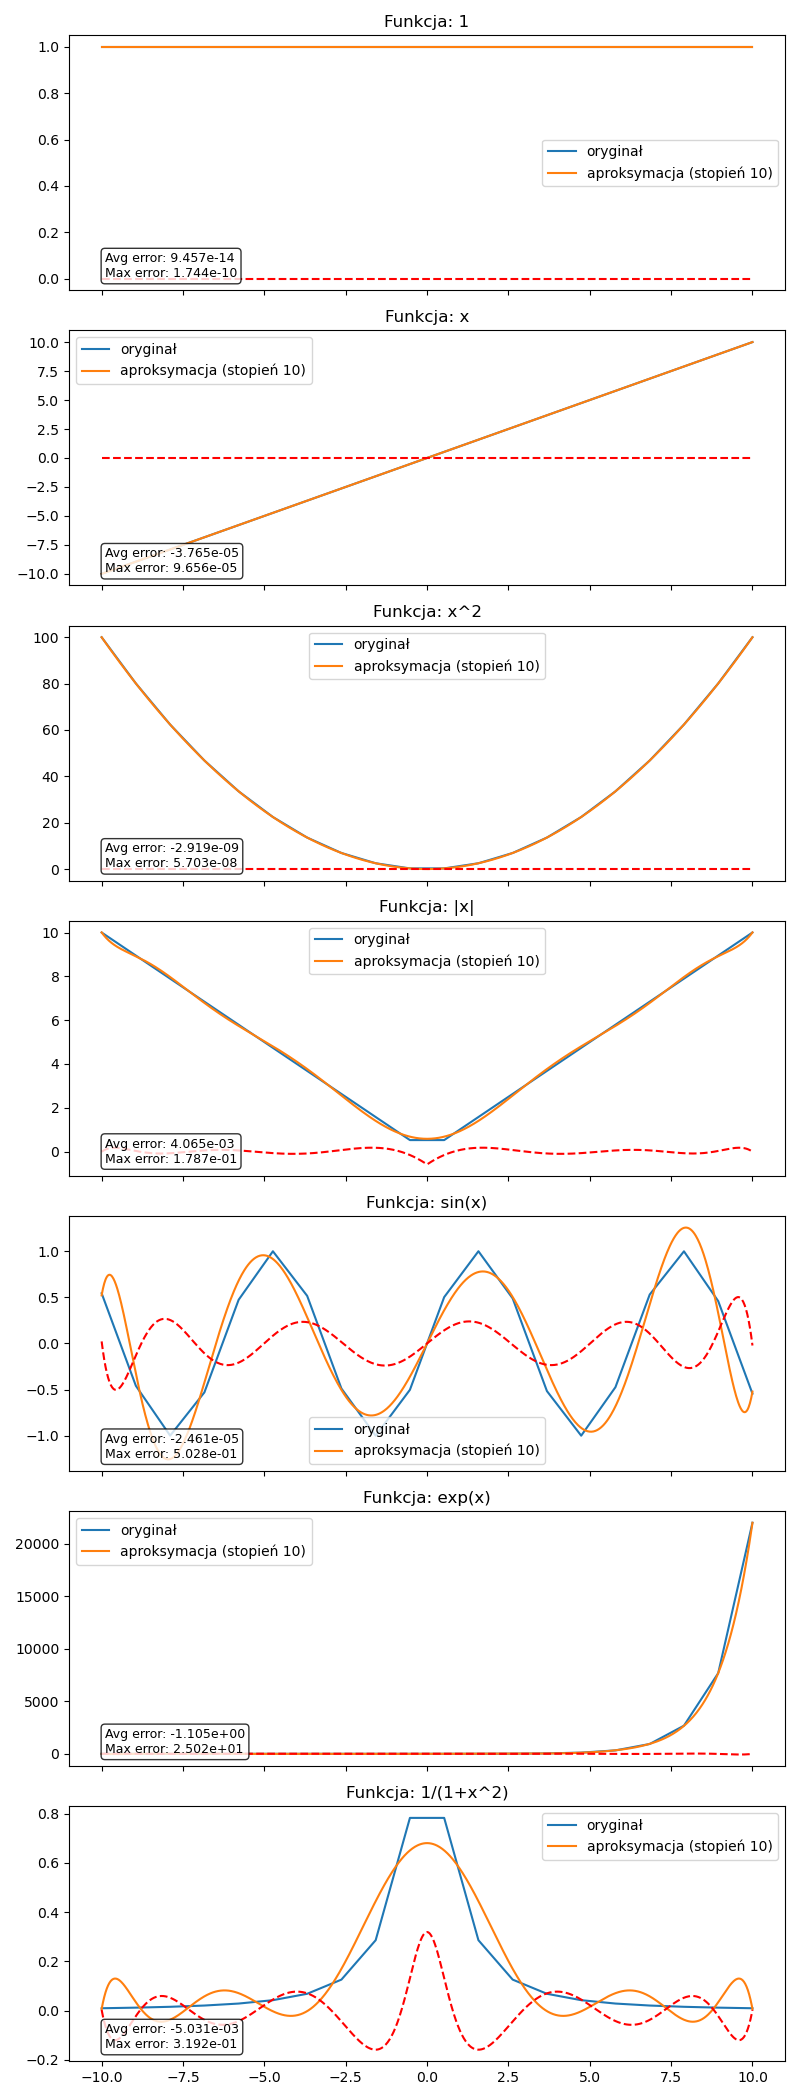

In [10]:
n_funcs = len(funkcje)
fig, axs = plt.subplots(n_funcs, 1, figsize=(8, 3*n_funcs), sharex=True)

for idx, (name, f) in enumerate(funkcje.items()):
    F = np.vectorize(f)
    approx, coeffs = legendre_approx(x, F(x), approx_degree)
    axs[idx].plot(x, F(x), label="oryginał")
    axs[idx].plot(approx_x, approx(approx_x), label=f"aproksymacja (stopień {approx_degree})")
    axs[idx].set_title(f"Funkcja: {name}")
    axs[idx].legend()
    error = f(approx_x) - approx(approx_x)
    axs[idx].plot(approx_x, error, label="Błąd aproksymacji", linestyle='--', color='red')

    error_text = f"Avg error: {np.mean(error):.3e}\nMax error: {np.max(error):.3e}"
    axs[idx].text(0.05, 0.15, error_text, transform=axs[idx].transAxes, 
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                  fontsize=9, verticalalignment='top')


plt.tight_layout()
plt.show()